# Popular Data Science Questions

## An analysis of Data Science Stack Exchange

### Executive Summary

This project utilized publicly available data from Data Science Stack Exchange to evaluate trends in data science topics. The analysis showed that interest in machine learning is decreasing, while interest in deep learning is increasing.

The analysis also indicated that the field is utilizing Data Science Stack Exchange less over time.

## Introduction
Data Scientists are continuously generating new techniques and methodologies. This evolution requires data scientists to quickly and effectively integrate new knowledge into their workstreams. However, we often run into debugging, logistical, or theoretical problems which we are unable to solve on our own. When this occurs, we turn to others for help. One outlet for seeking that help is a collection of websites called [Stack Exchange](https://stackexchange.com/sites?view=grid#). These websites are crowd-sourced Q&A forums for a wide variety of topics.

[Data Science](https://datascience.stackexchange.com/) has its own Stack Exchange, and it is used as a resource for data scientists to ask questions about their projects, code, or concepts. We can use the posts in Data Science Stack Exchange (DSSE) to identify trends in the field for two reasons:

* The website has been in regular use for the past 7 years.
* New and challenging concepts are most likely to generate questions on the site.

## Methodology

To identify trends on DSSE, I needed a way to identify the core topic(s) of each post. The most straightforward method to achieve this was to use tags. The posting interface on DSSE explains tags in the following manner:

* Tags help the right people find and answer your question.

* Identify your tags by completing the sentence, "My question is about…"

* Include tags that are crucial to your question only

* Use existing popular tags

By definition, these tags are an easily accessible method by which to gauge post topic.

## Data Acquisition

Using the [SQL Query interface](https://data.stackexchange.com/datascience/query/new) provided on DSSE's website, I gathered a .csv file containing the data for this analysis.

The following SQL query was used to obtain the data subset:

```
SELECT *
FROM Posts
WHERE PostTypeId = 1
ORDER BY CreationDate DESC;
```

`PostTypeId = 1` identifies the post as a question, rather than an answer or a reply.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

## Data Cleaning

Cleaning these data will consist of the following steps:

1. Dropping unneeded and/or empty columns
2. Extract individual tags from the single string they are formatted into
3. Fill NaN values appropriately

In [2]:
dsse = pd.read_csv('1-4-2023.csv',parse_dates = ['CreationDate'])

# Drop unneeded columns
dsse.drop(labels = ['ParentId', 'DeletionDate', 'OwnerDisplayName', 'LastEditorDisplayName',
                    'ClosedDate', 'CommunityOwnedDate', 'ContentLicense', 'PostTypeId',
                    'LastEditDate', 'LastEditorUserId', 'LastActivityDate'],
          axis = 1,
          inplace = True)

dsse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35925 entries, 0 to 35924
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                35925 non-null  int64         
 1   AcceptedAnswerId  11634 non-null  float64       
 2   CreationDate      35925 non-null  datetime64[ns]
 3   Score             35925 non-null  int64         
 4   ViewCount         35925 non-null  int64         
 5   Body              35925 non-null  object        
 6   OwnerUserId       35694 non-null  float64       
 7   Title             35925 non-null  object        
 8   Tags              35925 non-null  object        
 9   AnswerCount       35925 non-null  int64         
 10  CommentCount      35925 non-null  int64         
 11  FavoriteCount     586 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 3.3+ MB


In [3]:
dsse.head()

,Id,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,120487,NaN,2023-03-26 02:15:15,0,2,<p>I would be very grateful if anyone can help...,148321.0,Doubt with Forecast values with orange,<forecast>,0,0,NaN
1,120484,NaN,2023-03-25 23:20:01,0,10,"<p>If you become a Kaggle Grand Master, it sho...",41908.0,Where do Kaggle Masters Work?,<kaggle>,1,0,NaN
2,120483,NaN,2023-03-25 22:21:43,0,4,<p>I'm trying to follow a tutorial about Tenso...,148317.0,Python Tensorflow - Predict human vs horses im...,<python><tensorflow><convolutional-neural-netw...,0,0,NaN
3,120482,NaN,2023-03-25 17:50:34,0,5,<p>We have a business that provides analytics ...,108087.0,Modeling time series with events data for ML,<machine-learning><machine-learning-model>,0,0,NaN
4,120480,NaN,2023-03-25 13:12:36,0,9,<p>I have been given time series of N stock pr...,107895.0,Determining clusters of time series,<time-series><clustering><dynamic-time-warping>,0,2,NaN


In [4]:
dsse.tail()

,Id,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount
35920,16,46.0,2014-05-14 01:57:56,17,430,"<p>I use <a href=""http://www.csie.ntu.edu.tw/~...",63.0,Use liblinear on big data for semantic analysis,<machine-learning><bigdata><libsvm>,2,0,NaN
35921,15,NaN,2014-05-14 01:41:23,2,656,<p>In which situations would one system be pre...,64.0,What are the advantages and disadvantages of S...,<databases>,0,1,NaN
35922,14,29.0,2014-05-14 01:25:59,26,1902,<p>I am sure data science as will be discussed...,66.0,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4,1,NaN
35923,7,10.0,2014-05-14 00:11:06,4,479,"<p>As a researcher and instructor, I'm looking...",36.0,What open-source books (or other materials) pr...,<education><open-source>,3,4,NaN
35924,5,NaN,2014-05-13 23:58:30,9,903,<p>I've always been interested in machine lear...,5.0,How can I do simple machine learning without h...,<machine-learning>,1,1,NaN


In [5]:
# Extract the individual tags from a string of format '<tag1a-tag1b><tag2a-tag2b>...<tagNa-tagNb>'
dsse['Tags'] = dsse['Tags'].apply(lambda s: re.findall(r'([^<>]+)',s))

In [6]:
dsse['FavoriteCount'] = dsse['FavoriteCount'].fillna(0).astype(int)

In [7]:
dsse['Tags']

0                                               [forecast]
1                                                 [kaggle]
2        [python, tensorflow, convolutional-neural-netw...
3               [machine-learning, machine-learning-model]
4          [time-series, clustering, dynamic-time-warping]
                               ...                        
35920                  [machine-learning, bigdata, libsvm]
35921                                          [databases]
35922                           [data-mining, definitions]
35923                             [education, open-source]
35924                                   [machine-learning]
Name: Tags, Length: 35925, dtype: object

## Analysis
### Tag used and views over time
By tracking the relative used of tags, as well as the number of times each tag is viewed, we can measure the relative popularity of different topics in data science over the past 9 years.

In [8]:
# Count the frequency of tags in the dataset by year
years_of_interest = range(2014,2024)
tag_used_raw = pd.DataFrame(columns = years_of_interest)
tag_views_raw =      pd.DataFrame(columns = years_of_interest)

for i in range(dsse.shape[0]):
    row = dsse.loc[i,:]
    row_tags = row['Tags']
    question_year = row['CreationDate'].year
    question_views = row['ViewCount']
    
    for tag in row_tags:
        if (tag in tag_used_raw.index):
            tag_used_raw.loc[tag, question_year] = tag_used_raw.loc[tag, question_year] + 1
        else:
            tag_used_raw.loc[tag, years_of_interest] = 0
            tag_used_raw.loc[tag, question_year] = 1
            
        if (tag in tag_views_raw.index):
            tag_views_raw.loc[tag, question_year] = tag_views_raw.loc[tag, question_year] + question_views
        else:
            tag_views_raw.loc[tag, years_of_interest] = 0
            tag_views_raw.loc[tag, question_year] = 1


In [9]:
tag_used_raw.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
forecast,2,6,17,15,17,23,9,4,7,6
kaggle,2,3,6,11,10,37,19,20,5,3
python,43,130,313,473,1055,1438,1201,900,859,172
tensorflow,0,4,69,170,364,409,450,334,299,85
convolutional-neural-network,0,9,56,108,136,86,53,144,116,34


In [10]:
tag_views_raw.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
forecast,1824,12871,17091,41043,21260,61031,2764,103,491,71
kaggle,23202,1222,93852,23494,23597,93648,10224,4363,164,31
python,650787,1116395,3454351,3462310,6748414,3798557,1405709,570319,178249,6173
tensorflow,0,190519,528567,837459,994734,869585,547306,204120,54092,3534
convolutional-neural-network,0,353713,275588,371123,464517,123191,28756,76538,14034,1617


In [11]:
# Post-processing of used data to select top tags and calculate tag frequencies instead
#     of absolute number of tags.
tag_used = tag_used_raw.sort_values(2023, ascending = False)
total_tags = tag_used_raw[years_of_interest].sum()
tag_used = (tag_used / total_tags).astype(float).round(3)
top_tag_used = tag_used.iloc[:4,:]
top_tag_used = top_tag_used.reset_index()

print(f'Fraction of questions including a given tag by year')
print(f'---------------------------------------------------')
top_tag_used

Fraction of questions including a given tag by year
---------------------------------------------------


,index,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,machine-learning,0.122,0.136,0.111,0.118,0.114,0.104,0.095,0.088,0.087,0.084
1,python,0.031,0.045,0.052,0.056,0.065,0.070,0.060,0.060,0.053,0.049
2,deep-learning,0.006,0.010,0.026,0.050,0.055,0.044,0.042,0.046,0.045,0.037
3,nlp,0.028,0.019,0.020,0.020,0.018,0.022,0.025,0.028,0.026,0.031


In [12]:
# Post-processing of view data to select top tags and normalize them to the number of views
#     asked each year.
tag_views = tag_views_raw.sort_values(2023, ascending = False)
total_views = tag_views_raw[years_of_interest].sum()
tag_views = (tag_views / total_views).astype(float).round(3)
top_tag_views = tag_views.iloc[:4,:]
top_tag_views = top_tag_views.reset_index()

print(f'Fraction of views of a question including a given tag by year')
print(f'-------------------------------------------------------------')
top_tag_views

Fraction of views of a question including a given tag by year
-------------------------------------------------------------


,index,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,machine-learning,0.124,0.114,0.087,0.114,0.100,0.079,0.075,0.065,0.095,0.090
1,nlp,0.016,0.012,0.014,0.018,0.010,0.018,0.023,0.025,0.029,0.057
2,python,0.058,0.070,0.094,0.096,0.121,0.110,0.082,0.096,0.078,0.055
3,openai-gpt,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.003,0.002,0.052


In [13]:
# Prepare data for plotting and plot
top_tag_used_melt = top_tag_used.melt(id_vars = ['index'],
                                    value_vars = years_of_interest)
top_tag_used_melt.columns = ['Tag', 'Year', 'value']

top_tag_views_melt = top_tag_views.melt(id_vars = ['index'],
                                        value_vars = years_of_interest)
top_tag_views_melt.columns = ['Tag', 'Year', 'value']

top_tag_used_melt.head()

,Tag,Year,value
0,machine-learning,2014,0.122
1,python,2014,0.031
2,deep-learning,2014,0.006
3,nlp,2014,0.028
4,machine-learning,2015,0.136


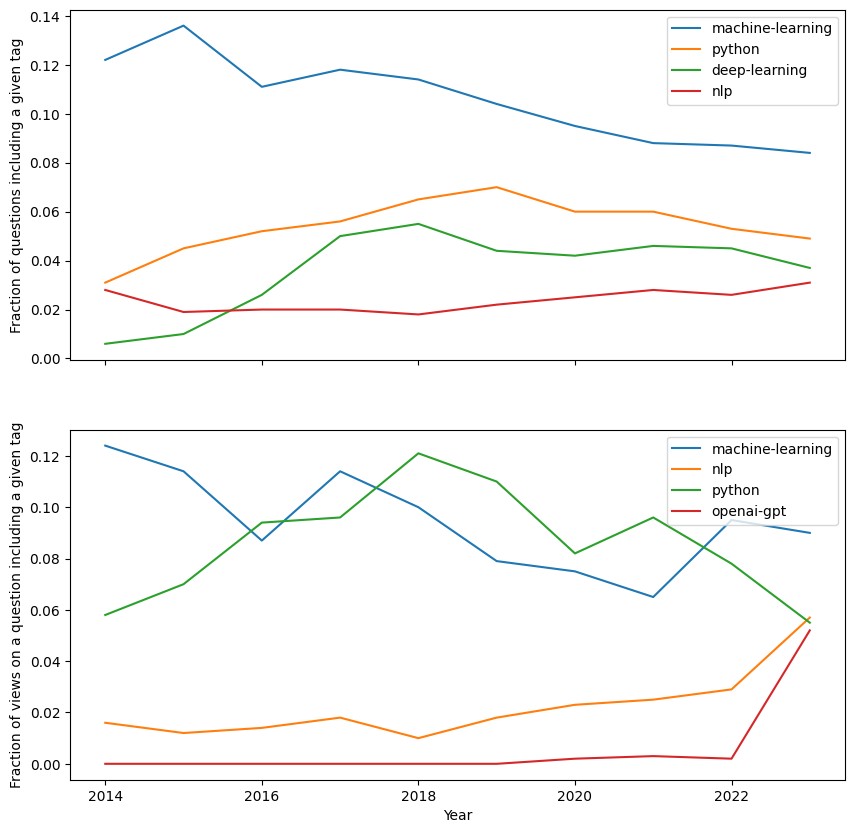

In [14]:
# create two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

# plot the first lineplot on the first subplot
for tag in top_tag_used_melt['Tag'].unique():
    df = top_tag_used_melt[top_tag_used_melt['Tag'] == tag]
    ax1.plot(df['Year'], df['value'], label=tag)
ax1.legend()
ax1.set_ylabel('Fraction of questions including a given tag')

# plot the second lineplot on the second subplot
for tag in top_tag_views_melt['Tag'].unique():
    df = top_tag_views_melt[top_tag_views_melt['Tag'] == tag]
    ax2.plot(df['Year'], df['value'], label=tag)
ax2.legend()
ax2.set_ylabel('Fraction of views on a question including a given tag')
ax2.set_xlabel('Year')

# display the plot
plt.show()

The plots above show (top) the fraction of all questions in a year that are tagged with one of the top four 2021 tags and (bottom) the fraction of all views that are on a question with a given tag by year.

With respect to tag used (top graph), we can make the following observations:

* Absolute tag frequency
    * Machine learning is consistently the most asked about topic on DSSE.
    * The fraction of questions tagged with deep learning peaked in 2018.
* Relative tag frequency
    * Deep learning had very few posts in 2014, but in 2023, it was assigned to 4% of questions.
    * Python has consistently been the second most frequent tag after machine-learning.


With respect to view fraction (bottom graph), we can make the following observations:

* Absolute view fraction
    * Of the most viewed tags in 2023, machine learning was the most viewed in 2014, but it has since dropped in view fraction.
    * The fraction of all views on python peaked in 2018.
* Relative view fraction
    * In 2022, openai-gpt increases dramatically with natural language processing.

## Overall activity on DSSE

Taking the two plots together, we can gain additional insight. Quantitatively, we can divide the number of times a tag was used by the number of views on posts with a given tag.This should give a better metric of community interest than the raw numbers alone.

To avoid skewing the results with low-view or low-post tags, I only analyzed the four most prevalent tags in 2023 - 'machine-learning', 'python', 'nlp', and 'openai-gpt'.

In [15]:
# Calculate the 'views per post'
top_4_tags = ['machine-learning', 'python', 'deep-learning', 'neural-network']
top_4_used_raw = tag_used_raw.loc[top_4_tags, :]
top_4_views_raw = tag_views_raw.loc[top_4_tags, :]

top_4_views_per_tag_use = (top_4_views_raw / top_4_used_raw).astype(int)
print(f'Number of views per post with a given tag')
print(f'-----------------------------------------')
top_4_views_per_tag_use

Number of views per post with a given tag
-----------------------------------------


,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
machine-learning,8088,4585,4850,4131,2995,1284,679,293,153,33
python,15134,8587,11036,7319,6396,2641,1170,633,207,35
deep-learning,26415,7470,13497,5492,3073,1701,693,380,168,30
neural-network,13362,7742,7345,4553,2962,1738,740,287,159,28


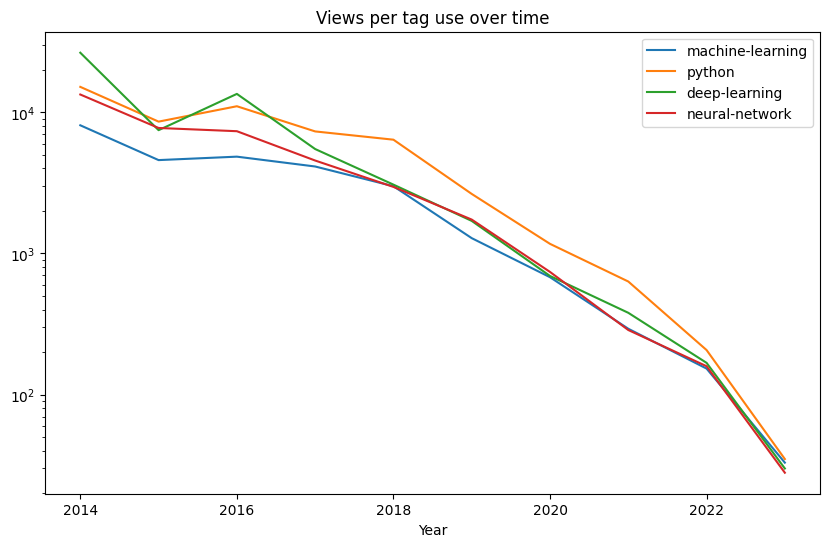

In [16]:
# reshape the data
top_4_views_per_tag_use_melt = top_4_views_per_tag_use.reset_index().melt(id_vars=['index'], value_vars=years_of_interest)
top_4_views_per_tag_use_melt.columns = ['Tag', 'Year', 'value']

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
for tag in top_4_views_per_tag_use_melt['Tag'].unique():
    tag_data = top_4_views_per_tag_use_melt[top_4_views_per_tag_use_melt['Tag'] == tag]
    ax.plot(tag_data['Year'], tag_data['value'], label=tag)

# set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('')
ax.set_title('Views per tag use over time')

# set the y-axis scale to logarithmic
ax.set_yscale('log')

# add the legend
ax.legend()

# show the plot
plt.show()

This plot paints a very different picture than the previous plots. For a start, 'deep learning', which had the fewest tag uses at the beginning of DSSE, had - by far - the highest number of views per post. This indicates that it was an intensely popular topic in 2014. The explanation for this might be that deep learning was in its infancy in 2014. It was accessible to only a few, yet intensely interesting to everyone in the field. Wikipedia's history of deep learning suggests this as well, where it mentions a ['deep learning revolution'](https://en.wikipedia.org/wiki/Deep_learning#Deep_learning_revolution) that started in 2012.

The immediately obvious trend on this graph is that there is a sharp decline in views per any tag over time. Three possible explanations for this are:

1. The number of questions is expanding more quickly than the number of interested viewers
2. The number of interested viewers is decreasing.
3. The number of tags per post is decreasing.

To check which of these is the case, we can simply plot the raw post and view numbers over time.

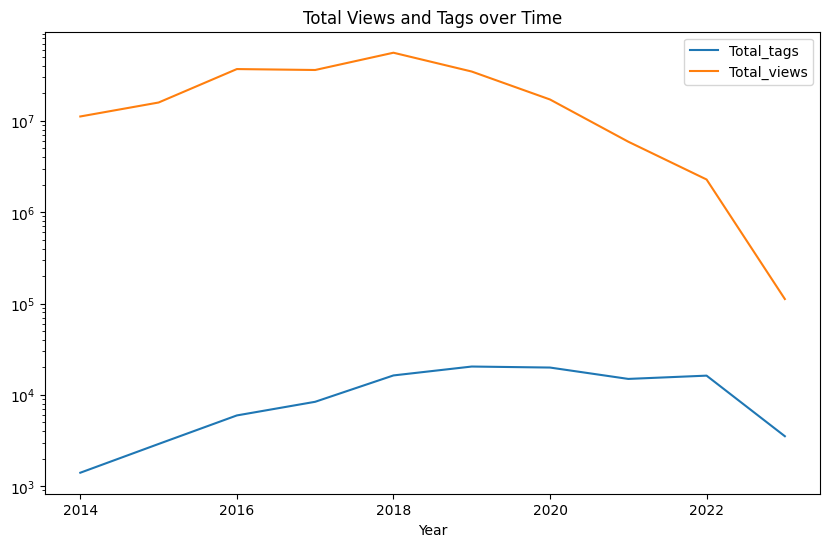

In [17]:
totals_plot = pd.DataFrame({'Total_views':total_views, 'Total_tags':total_tags}).reset_index()
totals_plot_melt = totals_plot.melt(id_vars = 'index',
                                    value_vars = ['Total_views', 'Total_tags'])

totals_plot_melt['value'] = totals_plot_melt['value'].astype(float)

fig, ax = plt.subplots(figsize=(10, 6))
for label, df in totals_plot_melt.groupby('variable'):
    ax.plot(df['index'], df['value'], label=label)
ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('')
ax.set_title('Total Views and Tags over Time')
ax.legend()
plt.show()

It is important to note that the data for 2023 is incomplete, so the final point on the curve will increase by the end of the year.

Overall, this data points towards a shift away from DSSE's use.

## Conclusion

In this project, I pulled a list of all the questions asked on Data Science Stack Exchange (DSSE) from the [DSSE data explorer](https://data.stackexchange.com/datascience/query/new) and analyzed the data using tags and views as proxies for interest in topics in the field over time. The analysis showed:

* Machine learning is consistently the most-tagged topic.
* The deep learning tag is growing, while machine learning is shrinking.
* The number of views per tag in 2014 was highest for deep-learning, suggesting that although there were a small number of posts in 2014, they were massively popular.
* The number of tags used and the number of views on tags is decreasing over time. This could signal a decrease in total activity on DSSE.